<a href="https://colab.research.google.com/github/snghynn/summ/blob/main/kaggle6_%EC%9D%98%EB%A5%98_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kaggle 6. Tensorflow 기본 분류: 의류 이미지 분류

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


### 0. 패션 MNIST 데이터셋 임포트
- 10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용
- 이미지는 해상도(28x28 픽셀)가 낮음
- 개별 옷 품목을 나타냄


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 1. 데이터 탐색

In [4]:
train_images.shape # 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줌. 각 이미지는 28x28 픽셀로 표현

(60000, 28, 28)

In [5]:
len(train_labels) # 훈련 세트에는 60,000개의 레이블

60000

In [6]:
train_labels  # 각 레이블은 0과 9사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape # 테스트 세트에 10,000개의 이미지가 있다는 것을 보여줌. 각 이미지는 28x28 픽셀로 표현

(10000, 28, 28)

In [8]:
len(test_labels) # 테스트 세트에는 60,000개의 레이블

10000

### 2. 데이터 전처리


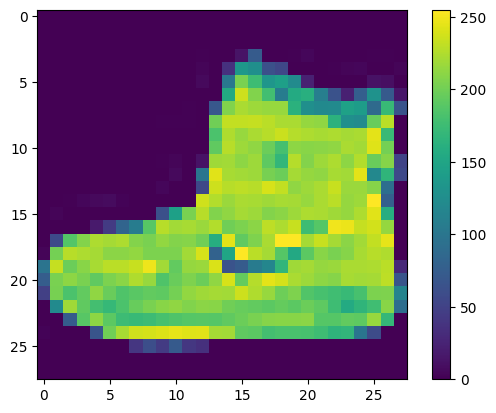

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

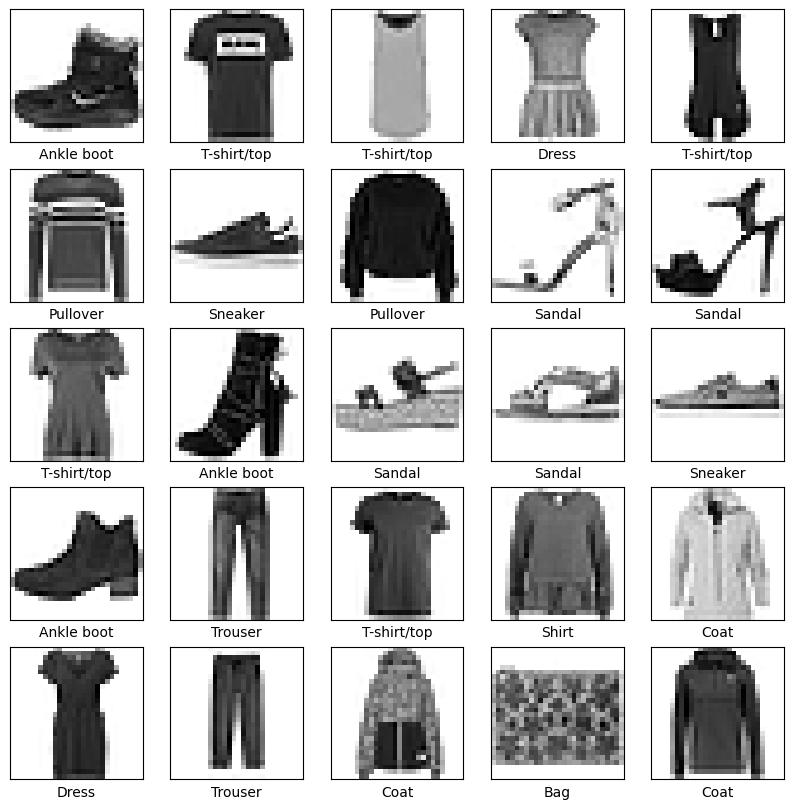

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 3. 모델링
- 레이어: 신경망의 기본 빌딩 블록
- 레이어에 공급된 데이터로부터 표현을 추출함


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 2차원 -> 1차원
    tf.keras.layers.Dense(128, activation='relu'), # 128개의 노드를 가짐
    tf.keras.layers.Dense(10) # 10개의 확률 반환
])

### 4. 모델 컴파일
< 모델 컴파일 옵션 >
- 손실 함수 : 훈련 중 모델이 얼마나 정확한지 측정. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 함.
- 옵티마이저 : 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
- 메트릭 : 훈련 및 테스트 단계를 모니터링하는 데 사용.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 5. 모델 훈련
< 신경망 모델 훈련 단계 >
1. 훈련 데이터를 모델에 주입
  - 이 예에서는 train_images와 train_labels 배열
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦
  - 이 예에서는 test_images 배열. 이 예측이 test_labels 배열의 레이블과 맞는지 확인
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4998 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2973 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2577 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

### 6. 정확도 평가
- 모델이 테스트 데이터세트에서 작동하는 방식 비교

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3470 - accuracy: 0.8833 - 468ms/epoch - 1ms/step

Test accuracy: 0.8833000063896179


> 테스트세트의 정확도가 훈련 세트의 정확도보다 낮음 (과대적합)

### 7. 예측
- softmax 레이어 연결해 로짓을 해석하기 쉬운 확률로 변환

In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [19]:
predictions[0]

array([2.2435795e-10, 5.9016569e-11, 8.1015805e-11, 5.3464279e-15,
       8.3625357e-10, 7.1822427e-04, 1.8085019e-09, 1.1160502e-03,
       8.8828042e-11, 9.9816573e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [23]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 8. 예측 확인
- 훈련된 모델을 사용하여 일부 이미지에 대한 예측 수행

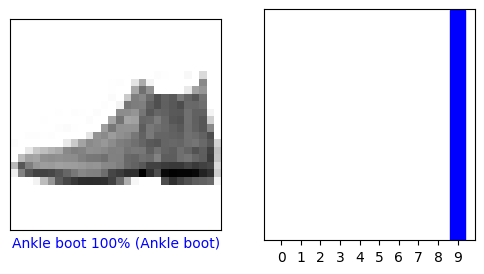

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

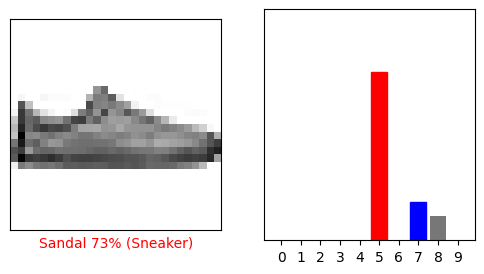

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

> - 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색
- 숫자는 예측 레이블의 신뢰도 퍼센트
- 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

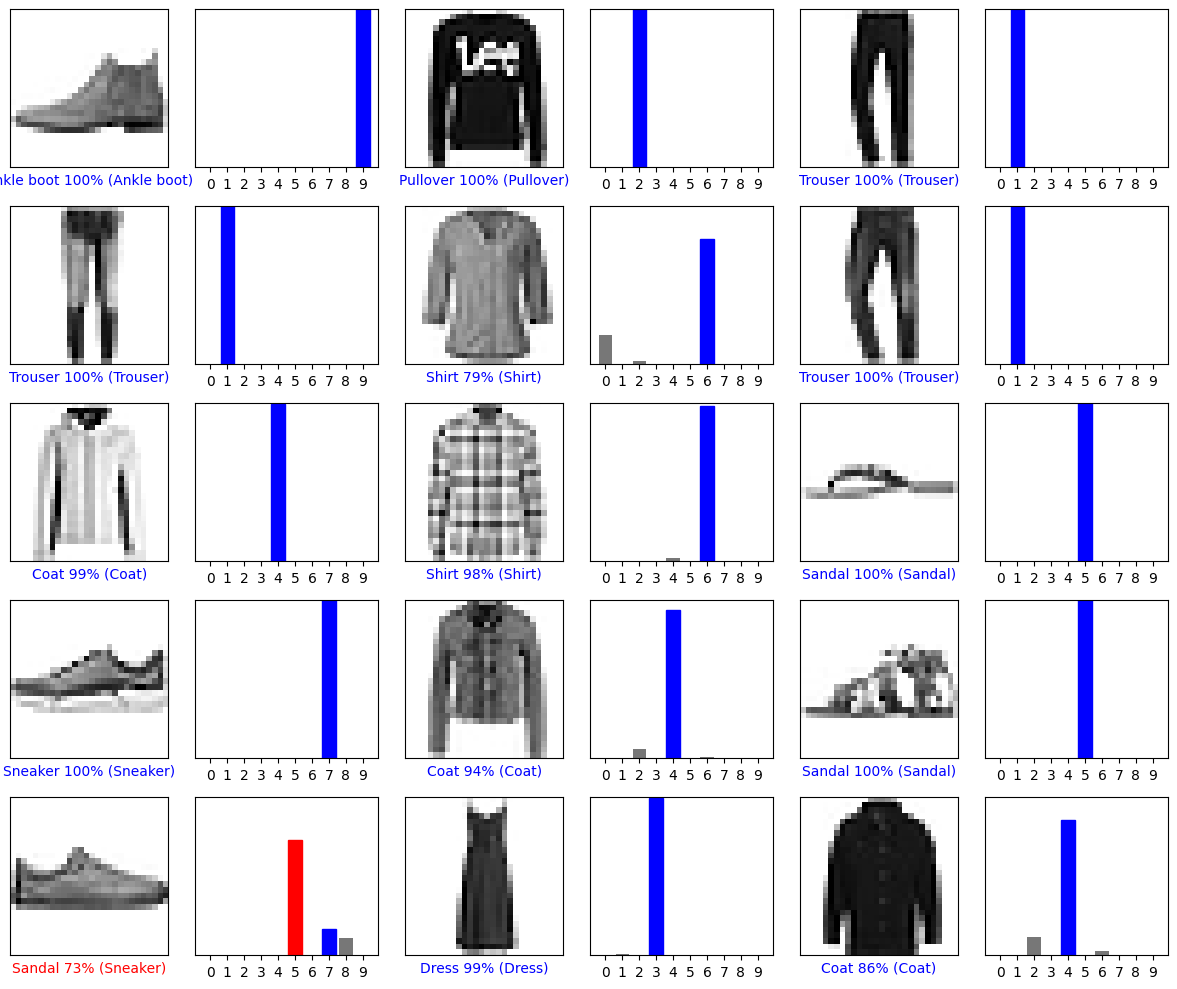

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### 9. 훈련된 모델 사용
- 훈련된 모델을 사용해 한 이미지에 대한 예측 만듦


In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 48ms/step
[[7.6456054e-06 2.7956725e-11 9.9828124e-01 6.8298395e-11 1.3687366e-03
  1.7749052e-13 3.4235898e-04 2.6942218e-20 6.1218114e-10 7.0620311e-12]]


In [30]:
np.argmax(predictions_single[0])

2

> 예상과 같이 모델이 레이블을 예측함